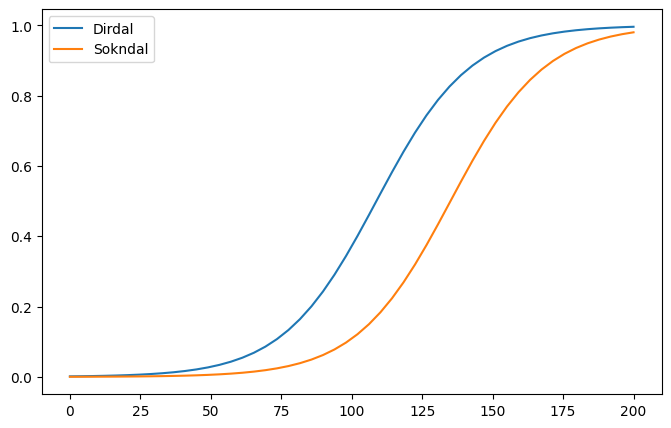

In [108]:
import numpy as np
import matplotlib.pyplot as plt

Beta = 0.06
Population_in_Dirdal = 683
Population_in_Sokndal = 3305
Starting_Zombies = 1
Timesteps = np.linspace(0, 200)

class Town:
    def __init__(self, location, population,beta=0.06, Timesteps=np.linspace(0, 200), Starting_Zombies = 1, eps = 1,E0=1,alpha=0.05,w_t=0, sigma=1/72):
        """
        This Function defines the object of which we are to draw the plot, instantiating the object is enough to call the plot,
        though it can be plotted sepparately using object.plot() at any time
        
        args:
        location is the location as string, for instance 'Dirdal'
        population sets the starting population of the village as int, for instance 683
        beta is an infection constant as float, here it is always 0.06, but if need be it can be changed, hence it is not hardcoded
        Timesteps is an array of integers for each timestep we wish to take, here it is an array of [0,...,199]
        Starting_Zombies lets us try different scenarios with different amount of starting zombies, for this assignment it is always 1 though.

        returns a plot of the population development
        """
        self.Name = location
        self.S0 = population
        self.Z0 = Starting_Zombies
        self.beta = beta
        self.T = Timesteps
        self.eps = eps
        self.R0 = beta/(alpha +w_t)
        self.alpha = alpha
        self.sigma= sigma
        self.w_t = w_t
        self.c0= np.array([self.Z0,self.S0-self.Z0])
        self.k0= np.array([self.S0,E0,self.Z0,self.R0])
Dirdal = Town('Dirdal', Population_in_Dirdal)
Sokndal = Town('Sokndal',Population_in_Sokndal)

def SZ_solution(town,t=None):
    """TODO: Skriv Docstring"""
    if t is None:
        t = town.T

    S = town.S0 - town.Z0


    CHP = (S * (S/town.Z0) * np.exp(-town.beta*t)) / (1 + (S/town.Z0) * np.exp(-town.beta*t))


    CZP = (S+ town.Z0) / (1 + (S/town.Z0) * np.exp(-town.beta*t))
    return np.array(CHP), np.array(CZP)
    
def Calculating_fraction_of_zombies(town, CZP):
    """TODO: Skriv Docstring"""
    Fraction_of_zombies = CZP / town.S0
    return Fraction_of_zombies
    
def plot(town, Z):
    """TODO: Skriv Docstring"""
    plt.plot(town.T, Z,label=town.Name)
plt.figure(figsize=(8,5))

_, CZP = SZ_solution(Dirdal)
Z = Calculating_fraction_of_zombies(Dirdal, CZP)
plot(Dirdal,Z)

_, CZP = SZ_solution(Sokndal)
Z = Calculating_fraction_of_zombies(Sokndal, CZP)
plot(Sokndal,Z)

#_, CZP = SZ_solution(Sokndal)
#Z = Calculating_fraction_of_zombies(Sokndal, CZP)
#plot(Dirdal,Z)


#Gammel kode begynner
#S_d, Z_d = SZ_solution(t, N_dirdal)
#S_s, Z_s = SZ_solution(t, N_sokndal)

#må dele på befolkning for å få like reprensativt tall
#Z_d_frac = Z_d / N_dirdal
#Z_s_frac = Z_s / N_sokndal

# plotting
#plt.figure(figsize=(8,5))
#plt.plot(t, Z_d_frac, label="Zombies Dirdal")
#plt.plot(t, Z_s_frac, label="Zombies Sokndal")
#Gammel kode slutter


plt.legend()

plt.show()


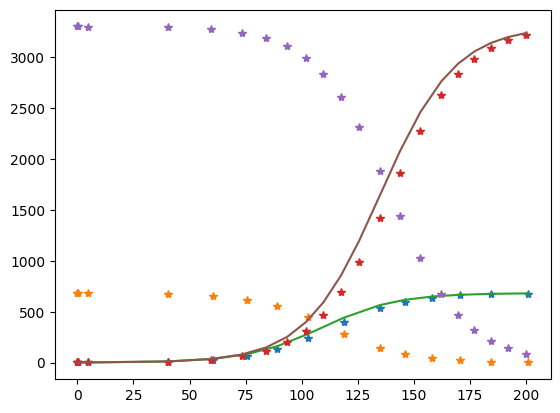

In [ ]:
def step(t, c_old, dt, f, method, *args, **kwargs):
    """
    Awesome doc string
    """
    if method == 'Euler':
        return dt*f(t, c_old, *args, **kwargs)
    elif method == 'RK2':
        k1 = np.array(dt*f(t, c_old, *args, **kwargs))
        return dt*f(t+dt*0.5, c_old + 0.5*k1, *args, **kwargs)
    else:
        raise ValueError('Method ot implemented') 


def ode_solver_adaptiv(town, f, method, *args, **kwargs):
    """
    A simple ODE solver

    Input
    -----
    t0: float, starting time
    t_final: float, end time
    c0: float, initial condition
    eps: float, accuracy
    f: ode function (rhs) f(t,c,tau)
    tau: float, a parameter

    Output
    -----
    t, c
    """
    c = [town.c0]
    t = [town.T[0]]
    dt_old = 1e-1
    if method == 'Euler':
        p = 1
    elif method == 'RK2':
        p = 2
    else:
        
        assert ValueError('Method not implemented')
    while t[-1] < town.T[-1]:
        c_old = c[-1]
        eps_calc = 10*town.eps #just to enter while loop
        while eps_calc > town.eps:
            dt = dt_old
            c_long = c_old + step(t[-1], c_old, dt, f, method, *args, **kwargs)
            c_half = c_old + step(t[-1], c_old, 0.5*dt, f, method, *args, **kwargs)
            c_two_half = c_half + step(t[-1]+0.5*dt, c_half, 0.5*dt, f, method, *args, **kwargs)
            eps_calc = np.linalg.norm((c_long-c_two_half)/(2**p-1))
            eps_calc = np.ceil(eps_calc * 1e5) / 1e5
            dt_old = dt*(town.eps/eps_calc)**(1/(p+1))
        c.append(c_two_half)
        t.append(t[-1]+dt)
    return np.array(t), np.array(c)

def rhs_z(t,c,town):
    return np.array([town.beta*c[0]*(1-c[0]/town.S0), -town.beta*c[1]*(1-c[1]/town.S0)])

def task_2(town):

    t, Z = ode_solver_adaptiv(town,  rhs_z,'RK2',town)
    S_d, Z_d = SZ_solution(town,t)
    plt.plot(t, Z,'*', label=f"Zombies {town.Name}")
    plt.plot(t, Z_d, label=f"Zombies {town.Name} numerical")

task_2(Dirdal)
task_2(Sokndal)


NameError: name 'task3' is not defined

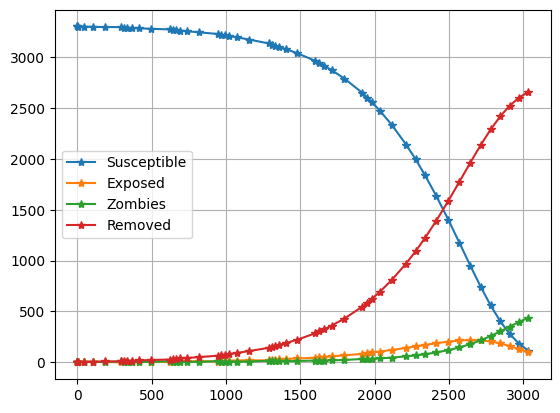

In [ ]:
def rhs_SDZR(t, c, K, N):
    S, E, Z, R = c
    beta, sigma, alpha, w_t = K
    SZ = S * Z / N

    d_S = -beta * SZ
    d_E = beta * SZ - sigma * E
    d_Z = sigma * E - (alpha + w_t) * SZ
    d_R = (alpha + w_t) * SZ

    return np.array([d_S, d_E, d_Z, d_R])



def task_3(town):
    town.c0 = town.k0
    town.T = np.linspace(0,3000)
    K = np.array([town.beta, town.sigma, town.alpha, town.w_t])
    N = town.S0
    t, Z = ode_solver_adaptiv(town, rhs_SDZR, 'RK2', K, N)  # pass parameters to RHS

    plt.plot(t, Z[:,0], '-*', label="Susceptible")
    plt.plot(t, Z[:,1], '-*', label="Exposed")
    plt.plot(t, Z[:,2], '-*', label="Zombies")
    plt.plot(t, Z[:,3], '-*', label="Removed")
    plt.legend()
    plt.grid()


task_3(Sokndal)
task_3(Dirdal)
#___ denne mp in i ode_solver_adaptiv ___ lingje 1 er der men må legge til den andre
#            eps_calc = np.linalg.norm((c_long-c_two_half)/(2**p-1))
#            eps_calc = np.ceil(eps_calc * 1e5) / 1e5